In [1]:
from __future__ import absolute_import, print_function,division, unicode_literals

import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

Using TensorFlow backend.


In [2]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [4]:
print(tf.__version__)

2.1.0


In [5]:
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
data_dir = "/home/dickens/Documents/PROJECT/Images"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = ['Gray Leaf Spot','Healthy','Maize Common Smut','Maize Streak Virus','Northern Leaf Blight']

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Gray Leaf Spot', 'Healthy', 'Maize Common Smut', 'Maize Streak Virus', 'Northern Leaf Blight']


In [7]:
#Group into train, test and validation sets
for cl in CLASS_NAMES:
    data_path = os.path.join(data_dir, cl)
    images = glob.glob(data_path + "/*")
    print("{} :{} ".format(cl,len(images)))
    train, val = images[:round(len(images)*0.8)],images[round(len(images)*0.8):]
    
    for t in train:
        if not os.path.exists(os.path.join(data_dir, 'train', cl)):
            os.makedirs(os.path.join(data_dir, 'train', cl))
        shutil.move(t,os.path.join(data_dir, 'train', cl))
        
    for v in val:
        if not os.path.exists(os.path.join(data_dir, 'val', cl)):
            os.makedirs(os.path.join(data_dir, 'val', cl))
        shutil.move(v,os.path.join(data_dir, 'val', cl))
    
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

Gray Leaf Spot :0 
Healthy :0 
Maize Common Smut :0 
Maize Streak Virus :0 
Northern Leaf Blight :0 


In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 1067 images belonging to 5 classes.
Found 64 images belonging to 5 classes.


In [9]:
def plotImages(img_arr):
    fig,axes = plt.subplots(1, 5,  figsize = (25, 25))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

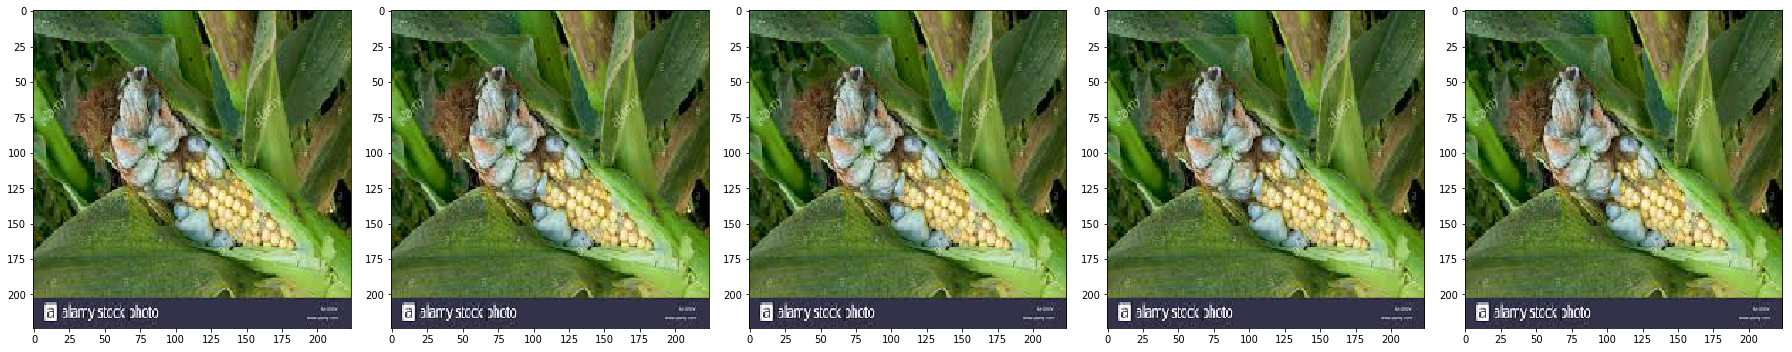

In [10]:
#plot a few train images
img_array = [train_generator[0][0][0] for i in range(5)]
plotImages(img_array)

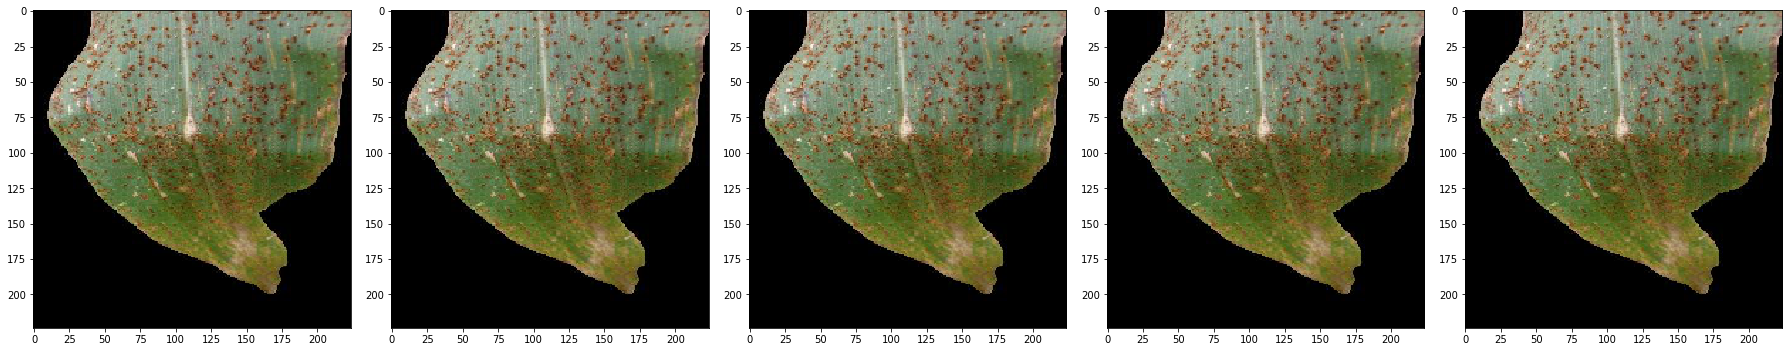

In [11]:
# plot a few val images
img_array  = [val_generator[0][0][0] for i in range(5)]
plotImages(img_array)

In [12]:
IMG_SHAPE = (IMG_HEIGHT,IMG_WIDTH,3)

In [13]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

In [14]:
base_model.trainable = False

In [15]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 2,626,821
Trainable params: 368,837
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 1 steps
Epoch 1/10
17/17 [==============================] - 78s 5s/step - loss: 1.3487 - accuracy: 0.6017 - val_loss: 1.7788 - val_accuracy: 0.6250
Epoch 2/10
17/17 [==============================] - 72s 4s/step - loss: 0.3523 - accuracy: 0.8847 - val_loss: 1.8036 - val_accuracy: 0.6406
Epoch 3/10
17/17 [==============================] - 73s 4s/step - loss: 0.1882 - accuracy: 0.9260 - val_loss: 2.5918 - val_accuracy: 0.6406
Epoch 4/10
17/17 [==============================] - 73s 4s/step - loss: 0.1064 - accuracy: 0.9625 - val_loss: 2.8398 - val_accuracy: 0.6250
Epoch 5/10
17/17 [==============================] - 72s 4s/step - loss: 0.0475 - accuracy: 0.9888 - val_loss: 3.1603 - val_accuracy: 0.6250
Epoch 6/10
17/17 [==============================] - 71s 4s/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 3.1398 - val_accuracy: 0.6406
Epoch 7/10
17/17 [==============================] - 75s 4s/step - los

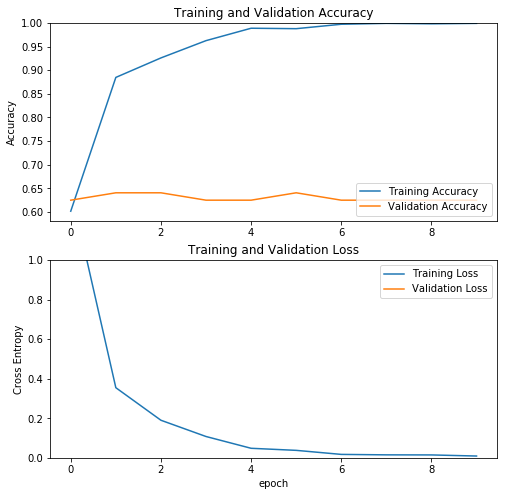

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
### Fine Tuning The model

In [ ]:
base_model.trainable = True

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 2,626,821
Trainable params: 2,231,429
Non-trainable params: 395,392
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 60


In [ ]:
epochs= 10

history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=epochs, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 1 steps
Epoch 1/10
17/17 [==============================] - 109s 6s/step - loss: 1.6568 - accuracy: 0.3046 - val_loss: 1.4428 - val_accuracy: 0.4844
Epoch 2/10
17/17 [==============================] - 105s 6s/step - loss: 0.8589 - accuracy: 0.7235 - val_loss: 1.2377 - val_accuracy: 0.6406
Epoch 3/10
17/17 [==============================] - 110s 6s/step - loss: 0.5525 - accuracy: 0.8613 - val_loss: 1.2520 - val_accuracy: 0.6406
Epoch 4/10
17/17 [==============================] - 106s 6s/step - loss: 0.4007 - accuracy: 0.8941 - val_loss: 1.2729 - val_accuracy: 0.6406
Epoch 5/10
17/17 [==============================] - 102s 6s/step - loss: 0.3106 - accuracy: 0.9213 - val_loss: 1.3581 - val_accuracy: 0.6406
Epoch 6/10
17/17 [==============================] - 100s 6s/step - loss: 0.2388 - accuracy: 0.9391 - val_loss: 1.3850 - val_accuracy: 0.6406
Epoch 7/10
 5/17 [=======>......................] - ETA: 1:14 -

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#optimize the model for inference
mode = "default"

if mode == 'Storage':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
  optimization = tf.lite.Optimize.DEFAULT
  
optimization

In [ ]:
saved_model_dir = 'Classifier-2020/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

with open('finetuned_maize_classifier_model.tflite', 'wb') as f:
  f.write(tflite_model)

with open('maize_classifier_labels.txt', 'w') as f:
  f.write('\n'.join(CLASS_NAMES))

!ls

In [ ]:
# Test the TFLITE model
interpretor = tf.lite.Interpreter(model_content=tflite_model)
interpretor.allocate_tensors()

#details
input_index = interpretor.get_input_details()[0]["index"]
output_index = interpretor.get_output_details()[0]["index"]

In [ ]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
test_batches = tf.data.Dataset.list_files(str(data_dir/'train/*/*'))

test_batches = test_batches.map(process_path).batch(1).prefetch(1)

for img, label in test_batches.take(15):
  interpretor.set_tensor(input_index, img)
  interpretor.invoke()
  predict = interpretor.get_tensor(output_index)
  print("Predicted: {} - {:2.0f}% : True: {}".format(CLASS_NAMES[np.argmax(predict)],
                                                     100*np.max(predict),
                                                     CLASS_NAMES[label[0].numpy()==1]))

In [ ]:
from PIL import Image

for index, (image, label) in enumerate(test_batches.take(5)):
  image = tf.cast(image * 255.0, tf.uint8)
  image = tf.squeeze(image).numpy()
  pil_image = Image.fromarray(image)
  pil_image.save('{}/test_images/{}_{}.jpg'.format(data_dir,CLASS_NAMES[label[0].numpy()==1][0].lower(), index))